In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import scipy.misc as spm
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
from scipy.spatial.distance import cdist
from sklearn import cluster
from skimage import color,io
from skimage.filters import threshold_otsu,threshold_multiotsu,prewitt,sobel
from skimage.data import camera
from skimage.util import compare_images
np.random.seed(0)

In [4]:
type(io.imread('./horse1-2.jpg'))

numpy.ndarray

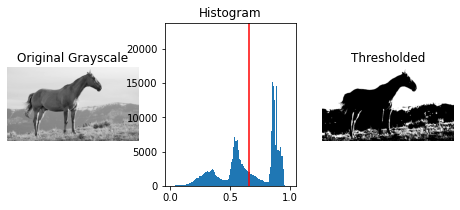

In [2]:
image = color.rgb2gray(io.imread('./horse1-2.jpg'))
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Grayscale')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

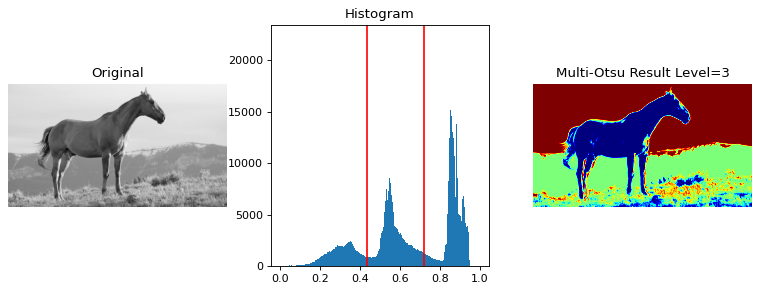

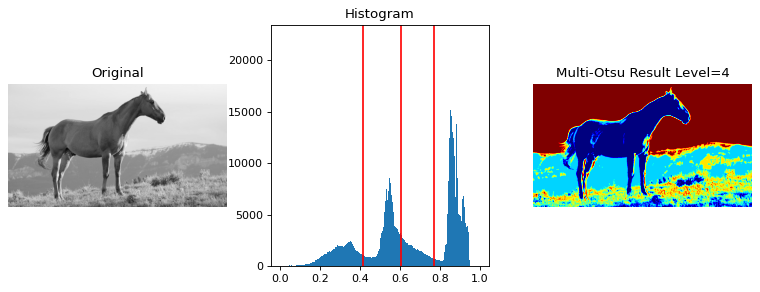

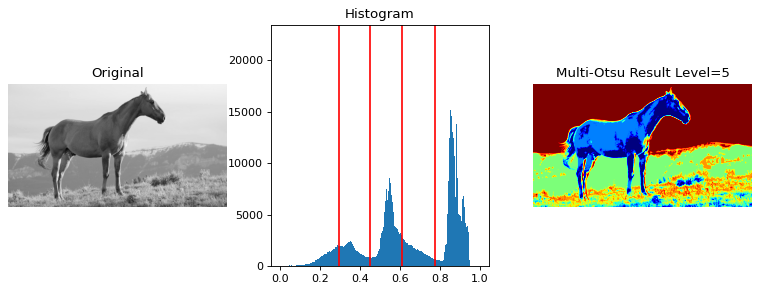

In [3]:

# Applying multi-Otsu threshold for the default value, generating
# three classes.
for level in [3,4,5]:
    thresholds = threshold_multiotsu(image,classes=level)

    # Using the threshold values, we generate the three regions.
    regions = np.digitize(image, bins=thresholds)

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),dpi=80)
    fig = plt.figure(1, figsize=(14,12),dpi=80)
    # Plotting the original image
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')

    # Plotting the histogram and the thresholds plotted on the histogram for multi-otsu
    ax[1].hist(image.ravel(), bins=255)
    ax[1].set_title('Histogram')
    for thresh in thresholds:
        ax[1].axvline(thresh, color='r')

    # Plotting the mutli-threshold result.
    ax[2].imshow(regions, cmap='jet')
    ax[2].set_title(f'Multi-Otsu Result Level={level}')
    ax[2].axis('off')

    plt.subplots_adjust()

    plt.show()

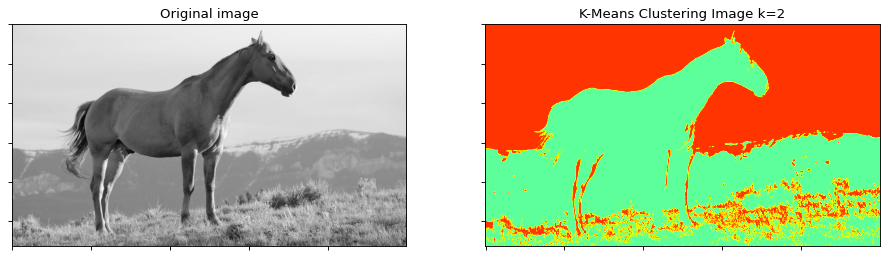

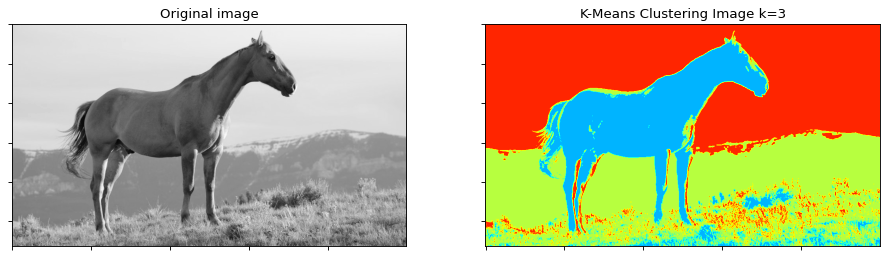

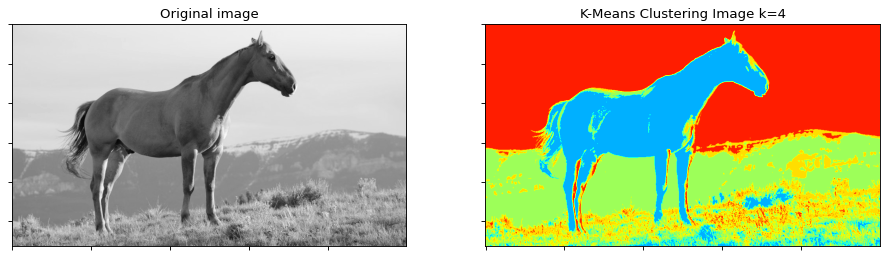

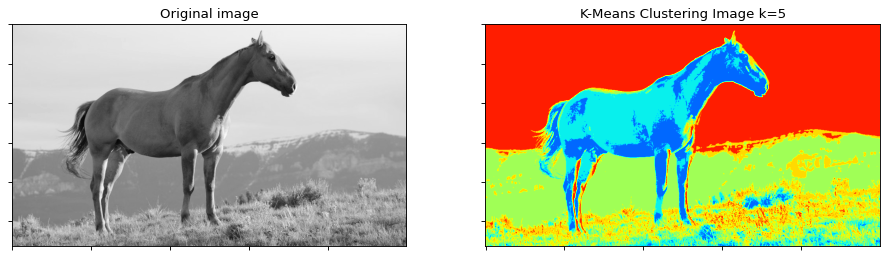

In [4]:

def kmeans_clustering(array, n_clusters):
    # Reshape the input array
    X = array.reshape((-1, 1))
    # Define the k-means clustering problem and specify the k or num of clusters
    k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
    # Solve the k-means clustering problem
    k_m.fit(X)
    # Get the coordinates of the clusters centers
    values = k_m.cluster_centers_.squeeze()
    # Get the label of each point
    labels = k_m.labels_
    return(values, labels)

for level in [2,3,4,5]:
    # Group similar k clusters
    values, labels = kmeans_clustering(image, n_clusters = level)
    # Create the segmented array from labels and values
    img_segmented = np.choose(labels, values)
    # Reshape the array as the original image
    img_segmented.shape = image.shape
    # Get the values of min and max intensity in the original image
    vmin = image.min()
    vmax = image.max()
    fig = plt.figure(1, figsize=(14,12),dpi=80)
    # Plot the original image
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(image,cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
    ax1.set_title('Original image')
    # Plot the simplified color image
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(img_segmented, cmap='jet', vmin=vmin, vmax=vmax)
    ax2.set_title(f'K-Means Clustering Image k={level}')
    # Get rid of the tick labels
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax2.set_xticklabels([])
    ax2.set_yticklabels([])
    plt.show()

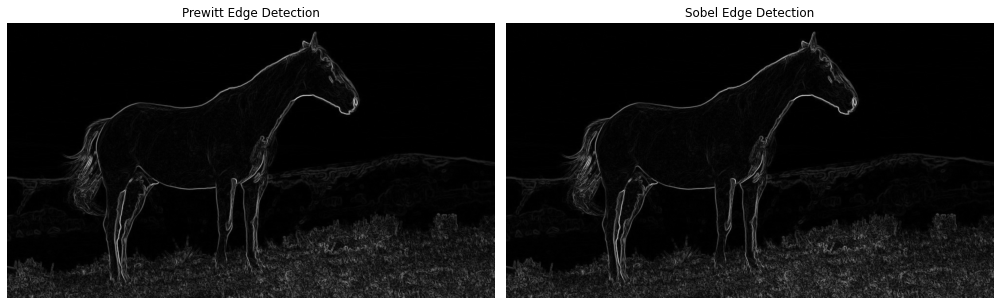

In [5]:
# %% EDGE DETECTION 
# * Sobel & Prewitt operators 

edge_prewitt = prewitt(image)
edge_sobel = sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(14, 12))

axes[0].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[0].set_title('Prewitt Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()